In [14]:
import os
import sys
import json
import pprint #pretty print
import glob
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
print sys.version
print "Pandas: ",pd.version.version
from __future__ import division
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics

np.random.seed(125)

2.7.10 |Anaconda 2.3.0 (64-bit)| (default, May 28 2015, 16:44:52) [MSC v.1500 64 bit (AMD64)]
Pandas:  0.16.2


In [3]:
bank_telemarket_df=pd.read_csv("C:/Users/xtl476/BigDataAcadBootCamp/Metis/Metis_Project_2/data/bank/bank.csv",sep=';')

In [4]:
print bank_telemarket_df.columns
bank_telemarket_df.head()

Index([u'age', u'job', u'marital', u'education', u'default', u'balance',
       u'housing', u'loan', u'contact', u'day', u'month', u'duration',
       u'campaign', u'pdays', u'previous', u'poutcome', u'y'],
      dtype='object')


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
bank_telemarket_df=bank_telemarket_df.rename(columns = {'y':'Response'})

In [6]:
bank_telemarket_df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [7]:
####################################################################################
#Data Type and Sanity Checks
####################################################################################
#Check for null values in movies dataframe
print "Number of rows which are Null by Column Names:\n"
print "\n",len(bank_telemarket_df.index)-bank_telemarket_df.count(),"\n"

Number of rows which are Null by Column Names:


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Response     0
dtype: int64 



In [8]:
for column, column_type in bank_telemarket_df.dtypes.iteritems():
    #print column, str(column_type)
    if str(column_type)!= 'int64':
        if column<>'age':
            print column,"\n\n",bank_telemarket_df[column].value_counts(),"\n"
        else:
            print column,"\n","Min: ",min(map(int,bank_telemarket_df[column])), "Max: ",max(map(int,bank_telemarket_df[column]))

job 

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
dtype: int64 

marital 

married     27214
single      12790
divorced     5207
dtype: int64 

education 

secondary    23202
tertiary     13301
primary       6851
unknown       1857
dtype: int64 

default 

no     44396
yes      815
dtype: int64 

housing 

yes    25130
no     20081
dtype: int64 

loan 

no     37967
yes     7244
dtype: int64 

contact 

cellular     29285
unknown      13020
telephone     2906
dtype: int64 

month 

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
dtype: int64 

poutcome 

unknown    36959
failure     4901
other       1840
success     1511
dtype: int64 

Response 

no     39922
yes 

In [69]:
#bank_telemarket_df['Response'].replace(['yes','no'], [1,0], inplace=True)

bank_telemarket_df['Count'] =1

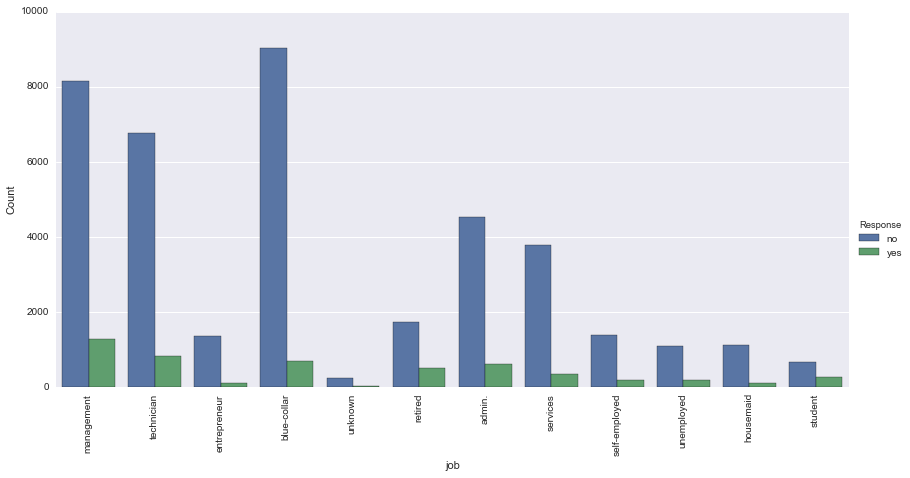

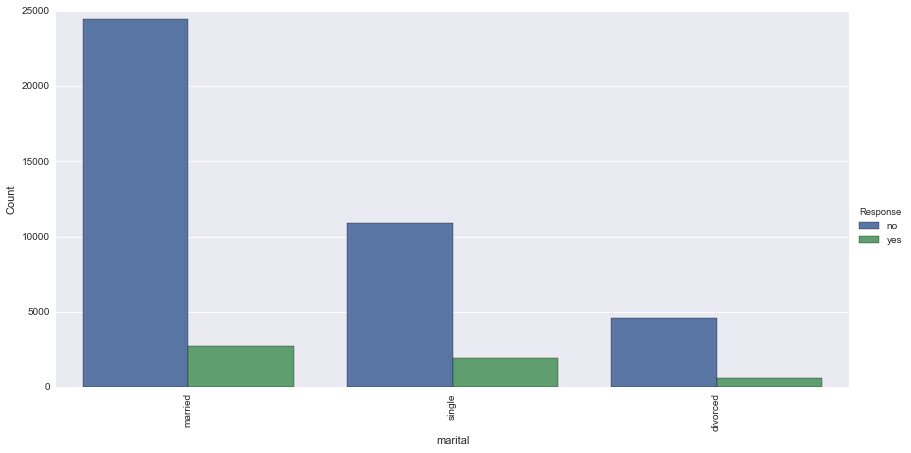

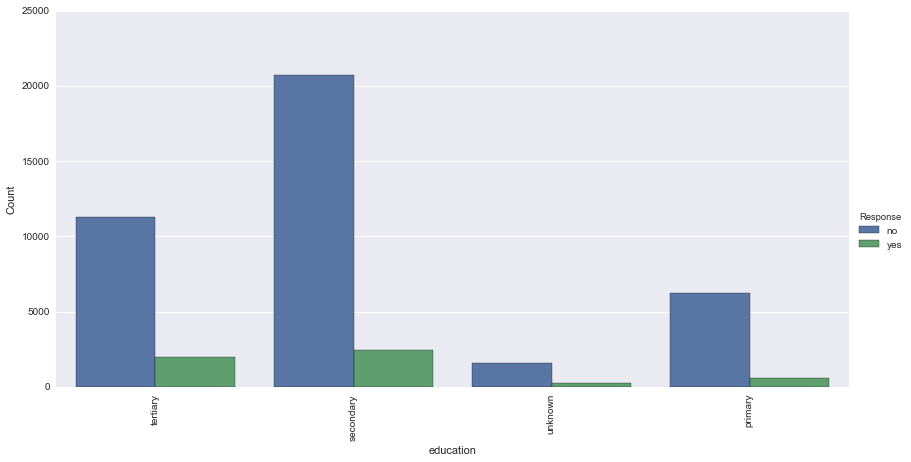

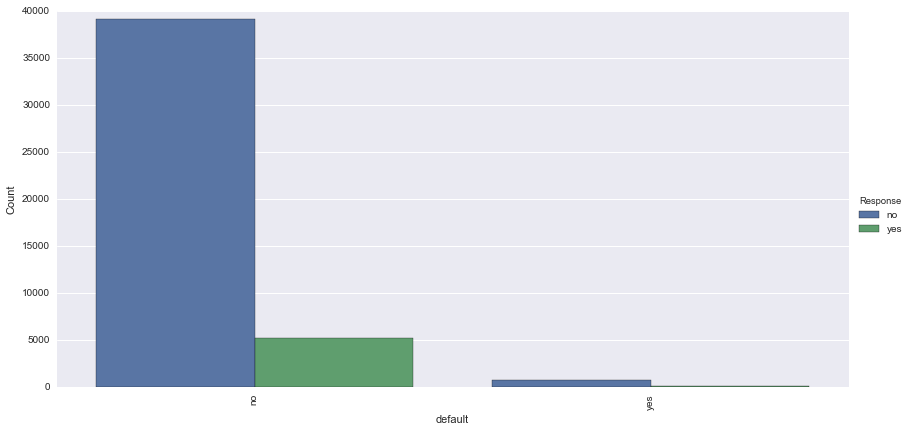

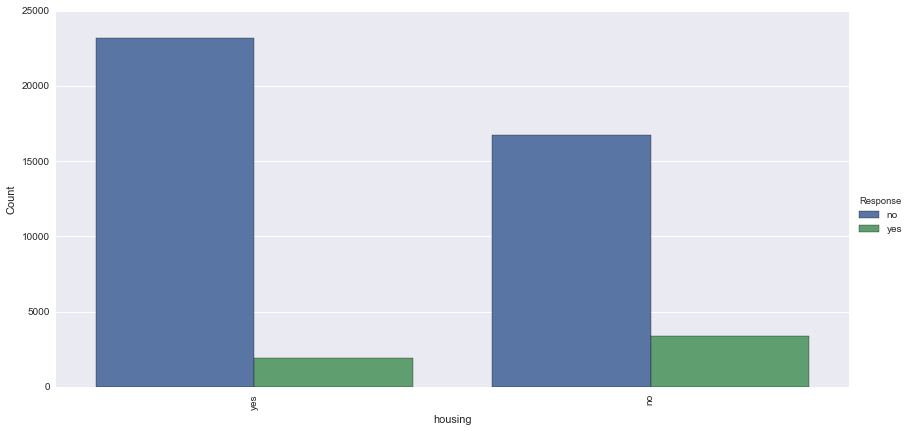

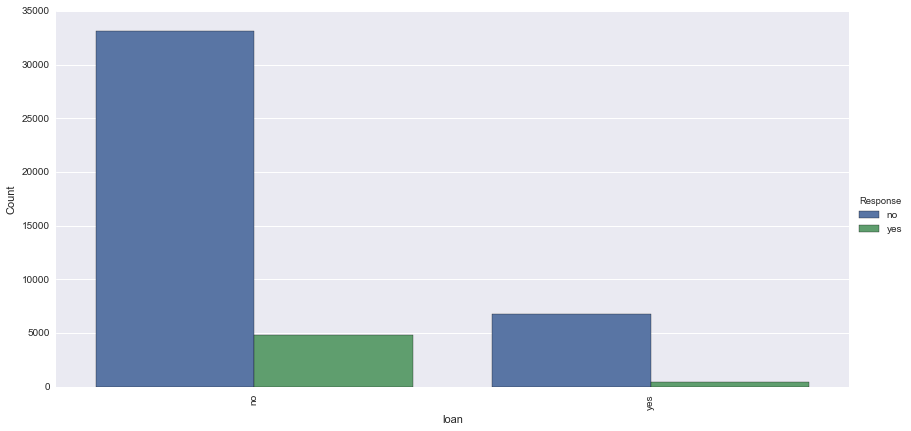

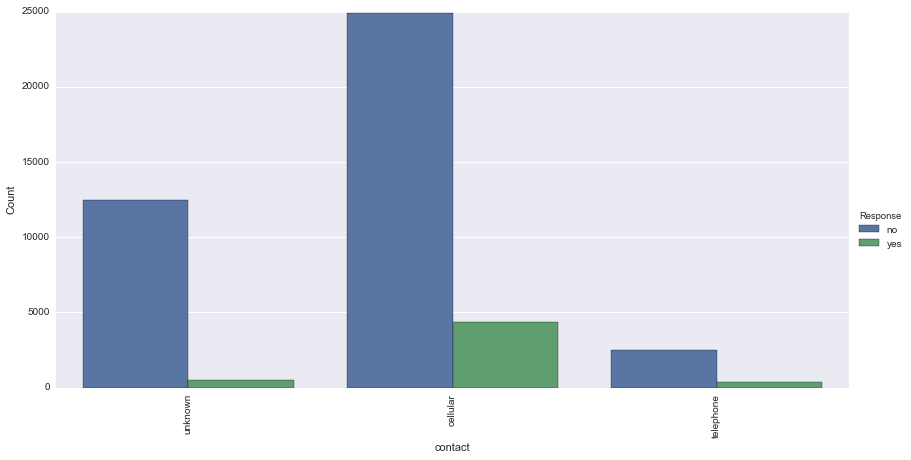

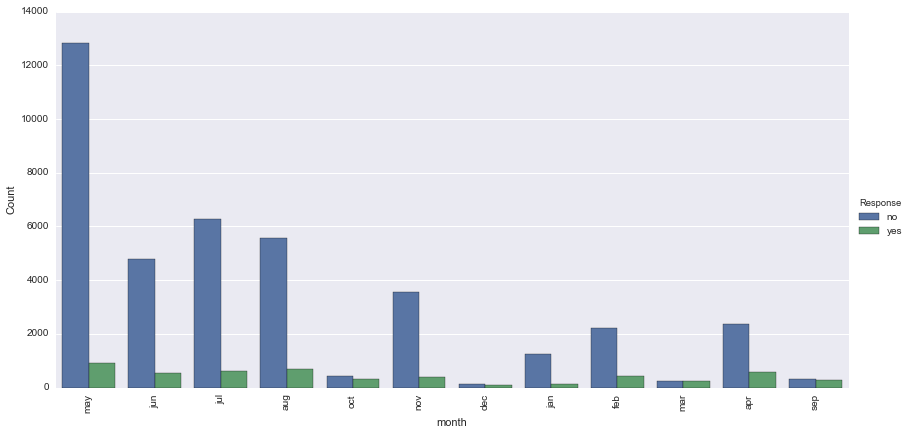

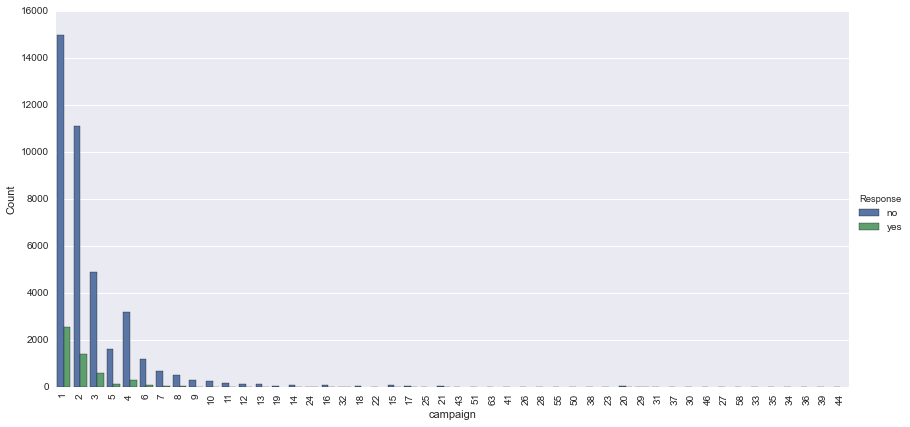

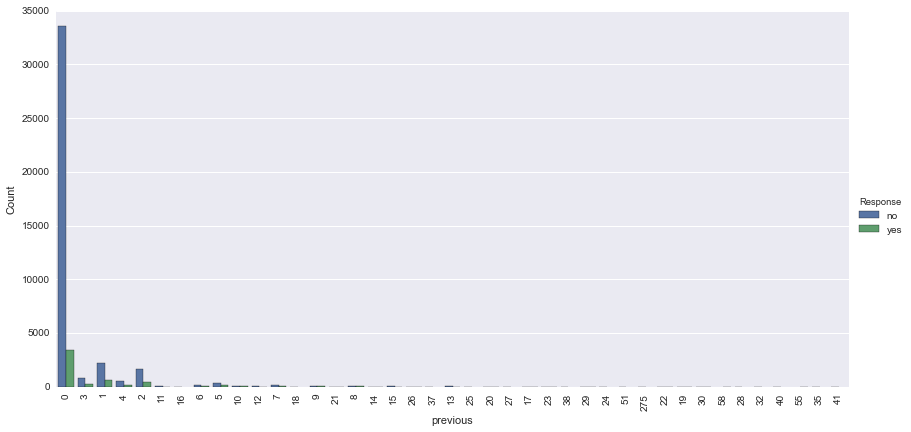

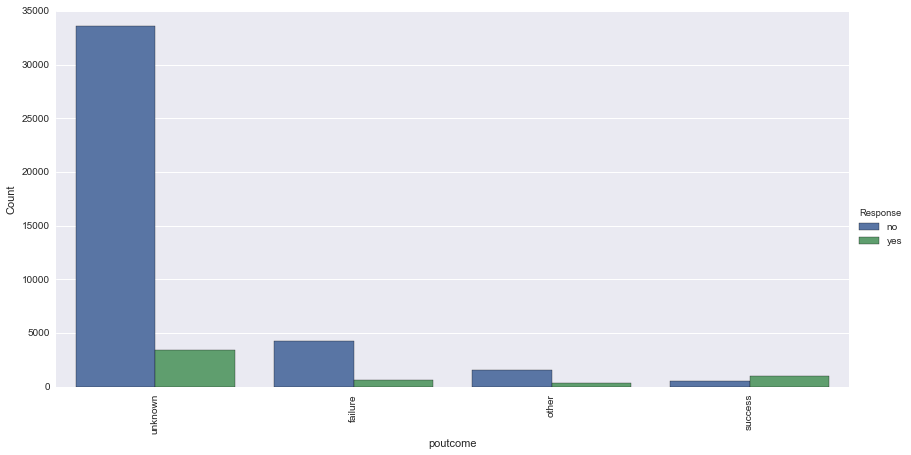

In [70]:
list_of_features = ['job','marital','education','default','housing','loan','contact','month','campaign','previous','poutcome']
for i in list_of_features:
    xlabels=bank_telemarket_df[i].unique()
    ax = sns.factorplot(x=i,y='Count',hue="Response",data=bank_telemarket_df,estimator=np.sum,kind='bar',size=6,aspect=2)
    ax.set_xticklabels(xlabels,rotation=90)

In [82]:
#Check Unique Values of education
print "\nOriginal Unqiue values of education\n"
#print pd.unique(bank_telemarket_df.education.ravel())
print bank_telemarket_df.education.value_counts()
list_of_features = ['job','marital','education','default','housing','loan','contact','month','campaign','previous','poutcome']
for i in list_of_features:
    print "\nOriginal Unqiue values of ",i,"\n"
    print pd.crosstab(bank_telemarket_df.Response, [bank_telemarket_df[i]] ,
                                         rownames=['Response'], colnames=[i])


Original Unqiue values of education

secondary    23202
tertiary     13301
primary       6851
unknown       1857
dtype: int64

Original Unqiue values of  job 

job       admin.  blue-collar  entrepreneur  housemaid  management  retired  \
Response                                                                      
no          4540         9024          1364       1131        8157     1748   
yes          631          708           123        109        1301      516   

job       self-employed  services  student  technician  unemployed  unknown  
Response                                                                     
no                 1392      3785      669        6757        1101      254  
yes                 187       369      269         840         202       34  

Original Unqiue values of  marital 

marital   divorced  married  single
Response                           
no            4585    24459   10878
yes            622     2755    1912

Original Unqiue values of  

In [ ]:
poutcome
previous top 9
months - oct, sep, mar , dec,nov
contact - telephone
default-
management
retured
student
services

In [10]:
from sklearn.cross_validation import train_test_split
#df.drop(df.columns[len(df.columns)-1], axis=1, inplace=True)

cols=[]
for column, column_type in bank_telemarket_df.dtypes.iteritems():
    #print column, str(column_type)
    if str(column_type)== 'int64':
        cols.append(column)    
print cols
Y=bank_telemarket_df['Response']
#X=bank_telemarket_df.ix[:,:-1]
X=bank_telemarket_df[cols]

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.33)

print len(X_train),len(X_test)

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
30291 14920


In [15]:
log_model=LogisticRegression()
log_model.fit(X_train,Y_train)
pd.DataFrame(log_model.predict(X_test),Y_test)
# check the accuracy on the training set
print "Logistic Regression Model Score: ",log_model.score(X_train, Y_train)
print "\n Accuracy Score:\n", metrics.accuracy_score(Y_test, log_model.predict(X_test))
print "\n Confusion Matrix:\n",metrics.confusion_matrix(Y_test, log_model.predict(X_test))
print "\n Classification Report:\n",metrics.classification_report(Y_test, log_model.predict(X_test))


Logistic Regression Model Score:  0.890198408768

 Accuracy Score:
0.885991957105

 Confusion Matrix:
[[12934   201]
 [ 1500   285]]

 Classification Report:
             precision    recall  f1-score   support

         no       0.90      0.98      0.94     13135
        yes       0.59      0.16      0.25      1785

avg / total       0.86      0.89      0.86     14920



In [65]:
####################################################################################
#Create a resampled dataframe which contains balanced target
####################################################################################
bank_subset_no_only=bank_telemarket_df[bank_telemarket_df.Response=='no']
#print bank_subset_no_only.Response.value_counts()
#bank_subset_no_only.ix[np.random.choice(bank_subset_no_only.index, 10)].count()
bank_subset_no_only_sample=bank_subset_no_only.ix[np.random.choice(bank_subset_no_only.index,10000)]
bank_subset_no_only_sample.describe()

bank_subset_resample_df=bank_subset_no_only_sample.append(bank_telemarket_df[bank_telemarket_df.Response=='yes'])

bank_subset_resample_df['Response'].value_counts()

####################################################################################
#  TO BE USED TO TRAIN THE MODEL - bank_subset_resample_df
####################################################################################


no     10000
yes     5289
dtype: int64

In [66]:
from sklearn.cross_validation import train_test_split
#df.drop(df.columns[len(df.columns)-1], axis=1, inplace=True)

cols=[]
for column, column_type in bank_subset_resample_df.dtypes.iteritems():
    #print column, str(column_type)
    if str(column_type)== 'int64':
        cols.append(column)    
print cols
Y=bank_subset_resample_df['Response']
#X=bank_telemarket_df.ix[:,:-1]
X=bank_subset_resample_df[cols]

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.33)

print len(X_train),len(X_test)

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
10243 5046


In [67]:
log_model=LogisticRegression()
log_model.fit(X_train,Y_train)
pd.DataFrame(log_model.predict(X_test),Y_test)
# check the accuracy on the training set
print "Logistic Regression Model Score: ",log_model.score(X_train, Y_train)
print "\n Accuracy Score:\n", metrics.accuracy_score(Y_test, log_model.predict(X_test))
print "\n Confusion Matrix:\n",metrics.confusion_matrix(Y_test, log_model.predict(X_test))
print "\n Classification Report:\n",metrics.classification_report(Y_test, log_model.predict(X_test))

Logistic Regression Model Score:  0.77203944157

 Accuracy Score:
0.76317875545

 Confusion Matrix:
[[2943  311]
 [ 884  908]]

 Classification Report:
             precision    recall  f1-score   support

         no       0.77      0.90      0.83      3254
        yes       0.74      0.51      0.60      1792

avg / total       0.76      0.76      0.75      5046



In [35]:
#skf = cross_validation.StratifiedKFold(X[:,i])
Y_train_new=[]
Y_test_new=[]
from sklearn import cross_validation

skf = cross_validation.StratifiedKFold(Y, n_folds=2)
print len(skf)
print(skf)  
#for train_index, test_index in skf:
#    print("TRAIN:", train_index, "TEST:", test_index)
#    X_train, X_test = X[train_index], X[test_index]
#    y_train, y_test = Y[train_index], Y[test_index]

for train, test in skf:
    Y_train_new.append(Y[train])
    Y_test_new.append(Y[test])
    
print Y_train_new
#.count('yes')
#print Y_test_new.count('no')

2
sklearn.cross_validation.StratifiedKFold(labels=['no' 'no' 'no' ..., 'yes' 'no' 'no'], n_folds=2, shuffle=False, random_state=None)
[20971     no
20972     no
20973     no
20974     no
20975     no
20976     no
20977     no
20978     no
20979     no
20980     no
20981     no
20982     no
20983     no
20984     no
20985     no
20986     no
20987     no
20988     no
20989     no
20990     no
20991     no
20992     no
20993     no
20994     no
20995     no
20996     no
20997     no
20998     no
20999     no
21000     no
        ... 
45181     no
45182    yes
45183     no
45184     no
45185    yes
45186     no
45187    yes
45188    yes
45189     no
45190    yes
45191    yes
45192    yes
45193    yes
45194     no
45195    yes
45196    yes
45197    yes
45198     no
45199     no
45200    yes
45201    yes
45202    yes
45203    yes
45204    yes
45205    yes
45206    yes
45207    yes
45208    yes
45209     no
45210     no
Name: Response, dtype: object, 0         no
1         no
2         no
3 